### Problem Statement

**Objective:** To predict the fuel efficiency of cars using various characteristics provided in the dataset.

**Target Variable:** Fuel_efficiency

**Features:** All other columns in the dataset excluding Fuel_efficiency

**Goal:** Build a linear regression model to accurately predict fuel efficiency based on the provided features.

simple lr --> x --> one var and y --> one var.
multiple lr --> x --> multiple var and y --> one var.

--> y = mx+c --> single linear regression equation

--> y = m1x1 + m2x2 + ... + mnxn + c  --> multiple linear regression eq.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Car_sales.csv")
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [6]:
# Convert columns to float
cols_to_float = [
    '4-year resale value',
    'Price in thousands',
    'Engine size',
    'Horsepower',
    'Wheelbase',
    'Width',
    'Length',
    'Curb weight',
    'Fuel capacity',
    'Fuel efficiency'
]

# Convert with error handling
for col in cols_to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Confirm the changes
print(df.dtypes)


Manufacturer            object
Model                   object
Sales in thousands     float64
4-year resale value    float64
Vehicle type            object
Price in thousands     float64
Engine size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb weight            float64
Fuel capacity          float64
Fuel efficiency        float64
Latest Launch           object
dtype: object


In [7]:
df.describe()

,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [8]:
# fetching the object type of data
df.describe(include = 'O')   # capital 'O' --> object type

,Manufacturer,Model,Vehicle type,Latest Launch
count,157,157,157,157
unique,30,156,2,130
top,Ford,Neon,Passenger,29-Jan-14
freq,11,2,116,2


In [9]:
# numeric + object
df.describe(include = 'all')

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130
top,Ford,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-Jan-14
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN
25%,NaN,NaN,14.114000,11.260000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,NaN
50%,NaN,NaN,29.450000,14.180000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,NaN
75%,NaN,NaN,67.956000,19.875000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  121 non-null    float64
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   155 non-null    float64
 6   Engine size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb weight          155 non-null    float64
 12  Fuel capacity        156 non-null    float64
 13  Fuel efficiency      154 non-null    float64
 14  Latest Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

**EDA**

In [11]:
df.isna().sum()

,0
Manufacturer,0
Model,0
Sales in thousands,0
4-year resale value,36
Vehicle type,0
Price in thousands,2
Engine size,1
Horsepower,1
Wheelbase,1
Width,1


In [12]:
# if the value lie under 30% of your total data --> drop it
# otherwise you have to fill the null values

In [13]:
157*0.3

47.1

In [ ]:
# numerical cols --> mean or median
# categorical cols --> mode

In [ ]:
#numerical
# df['Price_in_thousands'].fillna(df['Price_in_thousands'].mean(), inplace = True)
# df['Price_in_thousands'] = df['Price_in_thousands'].fillna(df['Price_in_thousands'].mean())


#cat.
# df['Vehicle_type'].fillna(df['Vehicle_type'].mode()[0], inplace = True)

In [14]:
# droping the null values
df.dropna(inplace = True)

In [15]:
df.isna().sum()

,0
Manufacturer,0
Model,0
Sales in thousands,0
4-year resale value,0
Vehicle type,0
Price in thousands,0
Engine size,0
Horsepower,0
Wheelbase,0
Width,0


In [16]:
#duplicates values
df.duplicated().sum()

np.int64(0)

In [17]:
df.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')

In [18]:
# rename the '4-year resale value' with 'year_resale_value'

df.rename(columns={'4-year resale value': 'year_resale_value'}, inplace = True)

In [19]:
df.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', 'year_resale_value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')

**finding and removing the outliers**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df.head(2)

,Manufacturer,Model,Sales in thousands,year_resale_value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15


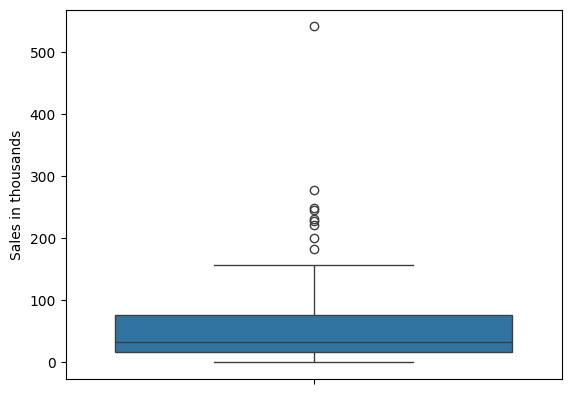

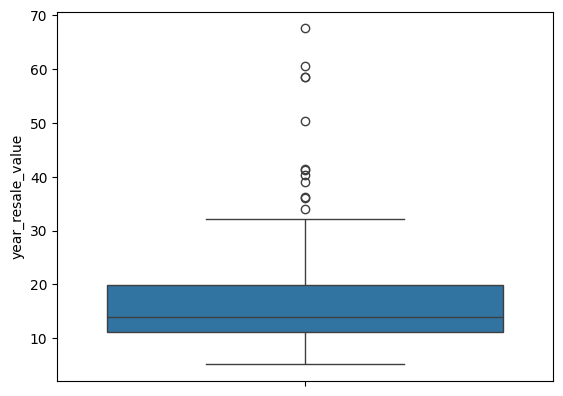

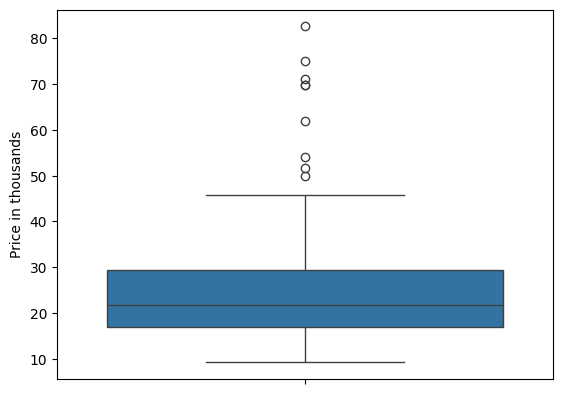

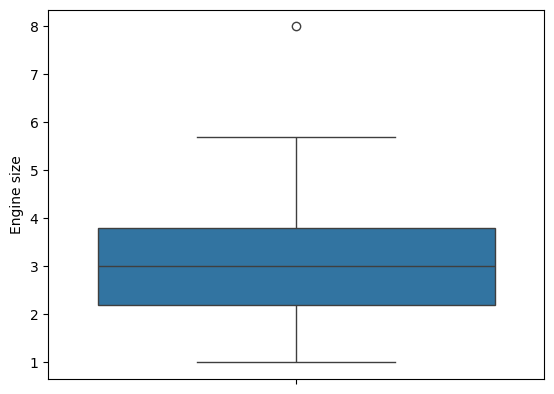

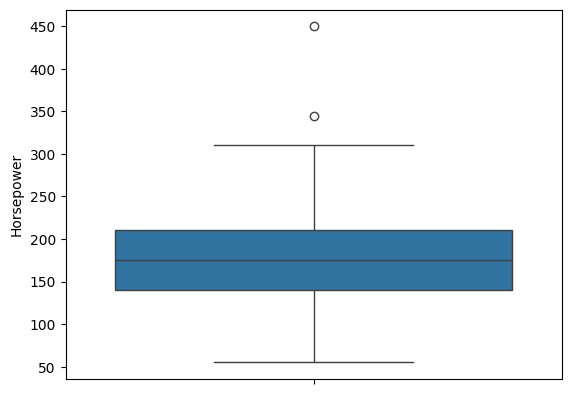

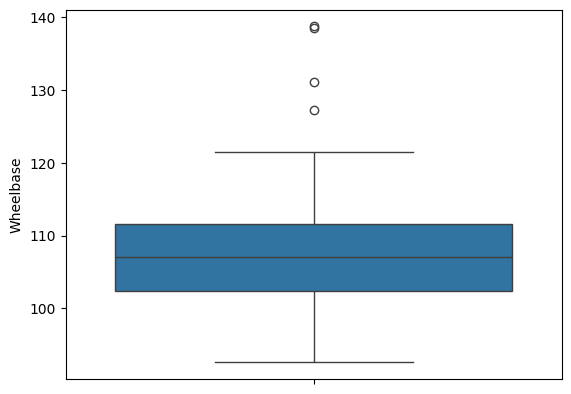

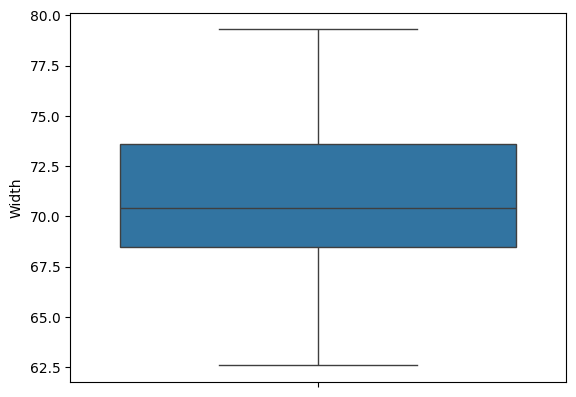

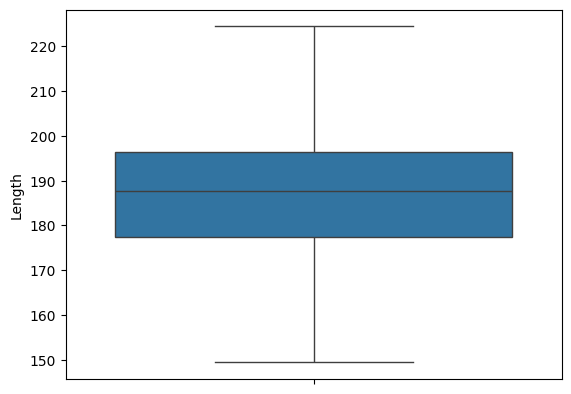

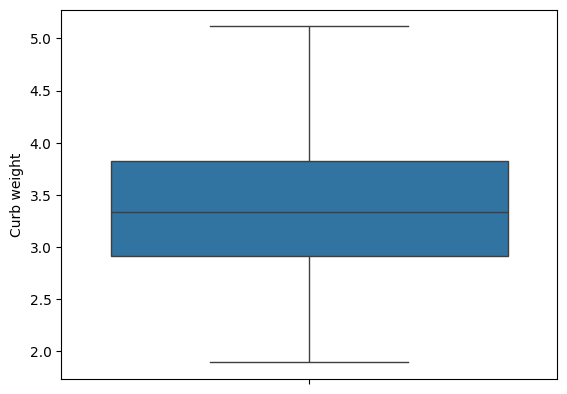

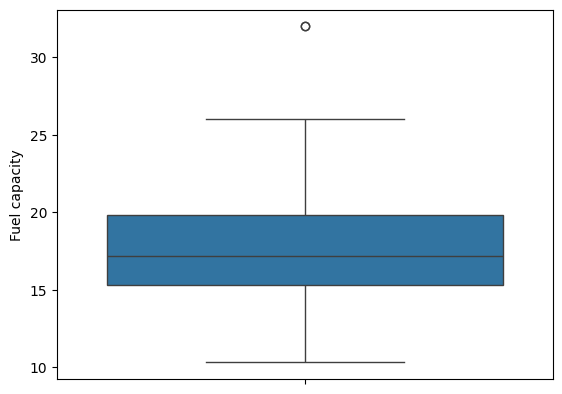

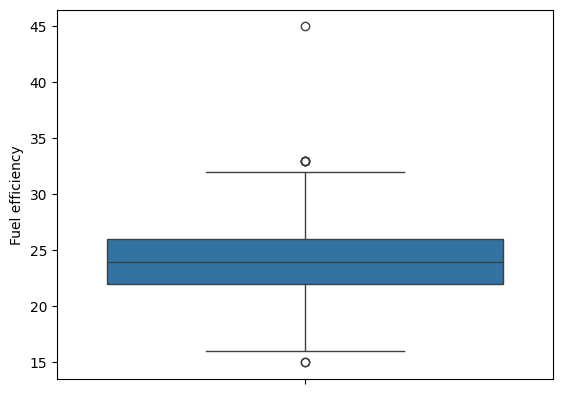

In [22]:
for i in df.columns:
  if df[i].dtypes != 'object':
    sns.boxplot(df[i])
    plt.show()

###iqr, UF, LF, Q1, Q3
- Q1 --> 25%
- Q3 --> 75%
- IQR --> Q3-Q1
- UF --> Q3 + 1.5*IQR
- LF --> Q1 - 1.5*IQR

In [23]:
df.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', 'year_resale_value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')

In [24]:
Q1 = df['Sales in thousands'].quantile(0.25)
Q3 = df['Sales in thousands'].quantile(0.75)
IQR = Q3-Q1
UF = Q3 + 1.5*IQR
LF = Q1 - 1.5*IQR
print(UF)
print(LF)

164.922
-72.126


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        117 non-null    object 
 1   Model               117 non-null    object 
 2   Sales in thousands  117 non-null    float64
 3   year_resale_value   117 non-null    float64
 4   Vehicle type        117 non-null    object 
 5   Price in thousands  117 non-null    float64
 6   Engine size         117 non-null    float64
 7   Horsepower          117 non-null    float64
 8   Wheelbase           117 non-null    float64
 9   Width               117 non-null    float64
 10  Length              117 non-null    float64
 11  Curb weight         117 non-null    float64
 12  Fuel capacity       117 non-null    float64
 13  Fuel efficiency     117 non-null    float64
 14  Latest Launch       117 non-null    object 
dtypes: float64(11), object(4)
memory usage: 18.7+ KB


In [27]:
# Ensure we are only processing numerical columns for outlier detection
numeric_cols = df.select_dtypes(include=['number']).columns

for i in numeric_cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  UF = Q3 + 1.5*IQR
  LF = Q1 - 1.5*IQR

  df = df[(df[i]>=LF) & (df[i]<=UF)]

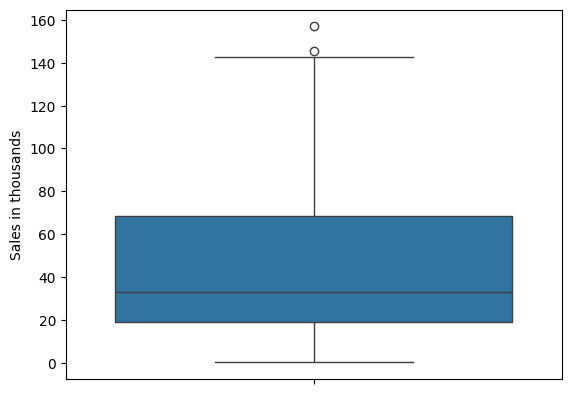

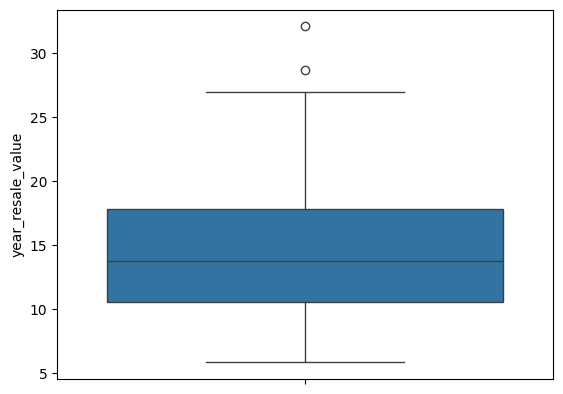

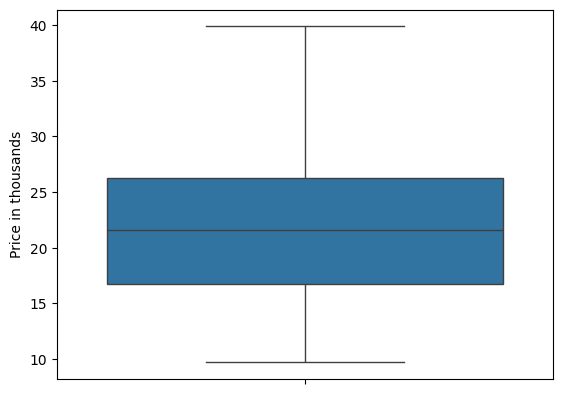

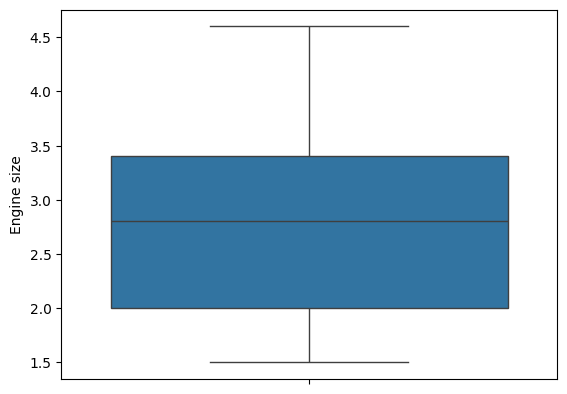

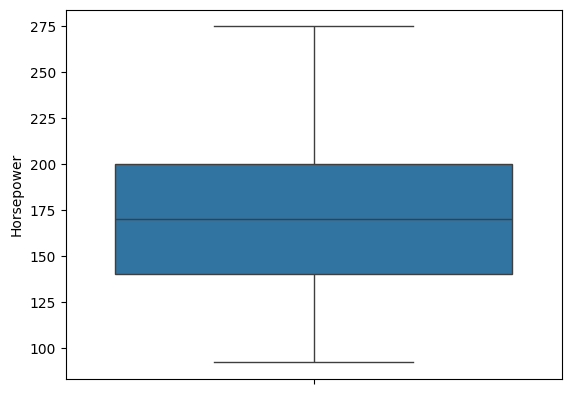

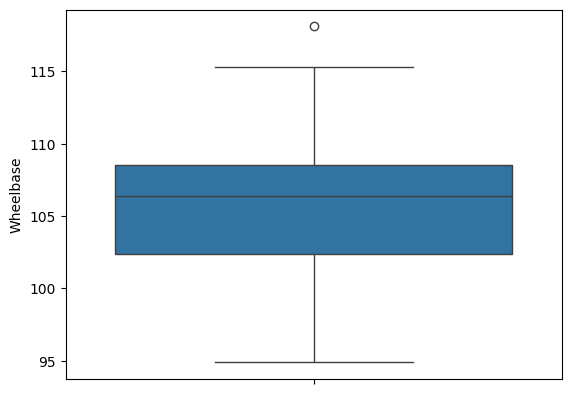

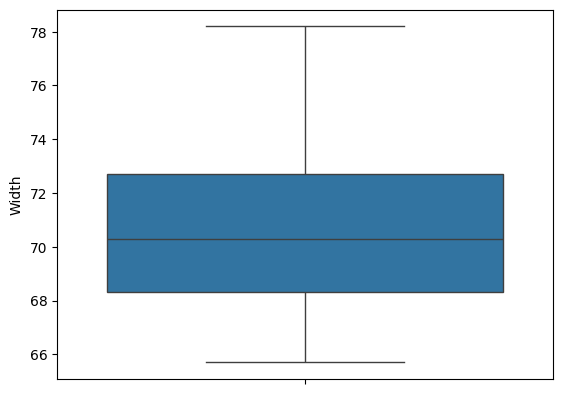

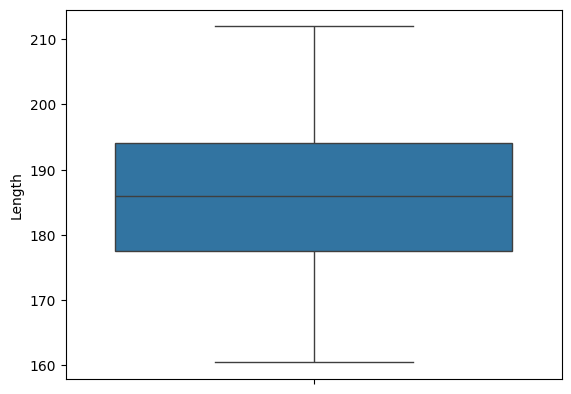

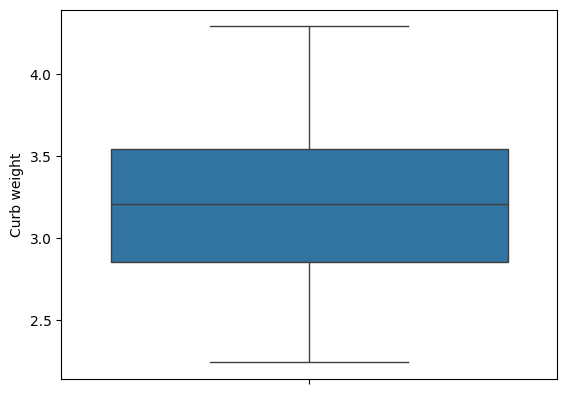

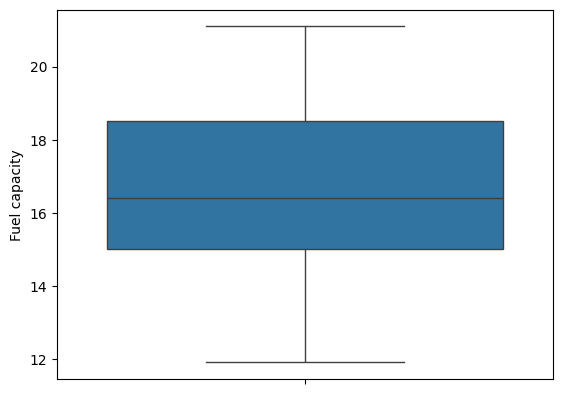

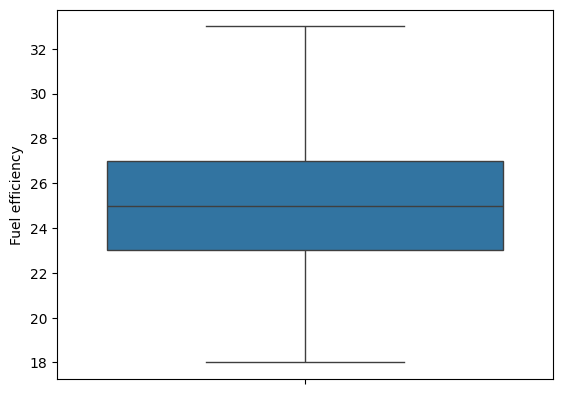

In [28]:
for i in df.columns:
  if df[i].dtypes != 'object':
    sns.boxplot(df[i])
    plt.show()

In [29]:
df.shape

(85, 15)

In [30]:
df.head(5)

,Manufacturer,Model,Sales in thousands,year_resale_value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8-Sep-15
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,29-Jan-14


In [31]:
df.describe()

,Sales in thousands,year_resale_value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,44.945059,14.719529,22.030318,2.836471,170.282353,105.862353,70.607059,186.380000,3.201094,16.591765,25.011765
std,36.382114,5.285190,7.158322,0.840613,42.672510,5.011510,3.106590,12.034591,0.503636,2.407687,3.420854
min,0.110000,5.860000,9.699000,1.500000,92.000000,94.900000,65.700000,160.400000,2.240000,11.900000,18.000000
25%,18.780000,10.595000,16.700000,2.000000,140.000000,102.400000,68.300000,177.500000,2.853000,15.000000,23.000000
50%,32.734000,13.760000,21.560000,2.800000,170.000000,106.400000,70.300000,186.000000,3.203000,16.400000,25.000000
75%,68.411000,17.810000,26.249000,3.400000,200.000000,108.500000,72.700000,194.100000,3.543000,18.500000,27.000000
max,157.040000,32.075000,39.895000,4.600000,275.000000,118.100000,78.200000,212.000000,4.288000,21.100000,33.000000


**Model Building**

**Single linear regression**

In [32]:
# single ind var
# single dep var

In [33]:
df.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', 'year_resale_value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')

In [35]:
X = df['Horsepower']  #indp. var
Y = df['Fuel efficiency'] # dep. var

In [36]:
#spliting the data --> train and test
from sklearn.model_selection import train_test_split

In [37]:
# spliting the data --> 70:30
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state = 35)

In [38]:
x_train.head(4)

,Horsepower
86,125.0
69,195.0
140,142.0
4,150.0


In [39]:
x_test.shape

(26,)

In [40]:
y_train.shape

(59,)

In [41]:
y_test.shape

(26,)

In [42]:
# calling the model --> S Linear Model
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()

In [44]:
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

In [45]:
y_pred = model.predict(x_test.values.reshape(-1,1))

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_pred,y_test)

-0.7607252238976325

In [48]:
l = []
for i in range(1000):
  x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.3, random_state = i)
  model = LinearRegression()
  model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
  y_pred = model.predict(x_test.values.reshape(-1,1))
  l.append(r2_score(y_pred,y_test))


print(max(l))
print(l.index(max(l)))

0.5360561316658665
501


In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.3, random_state = 211)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
y_pred = model.predict(x_test.values.reshape(-1,1))
r2_score(y_pred,y_test)

0.13575135231461255